In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [12]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
#tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 0


In [14]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Image (#10): Which is digit '3'


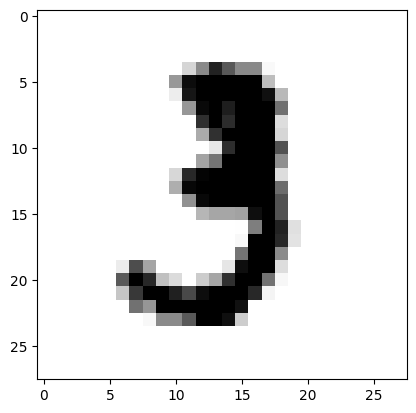

In [15]:
digit = 10 # Change to choose new digit
a = X_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{Y_train[digit]}'")

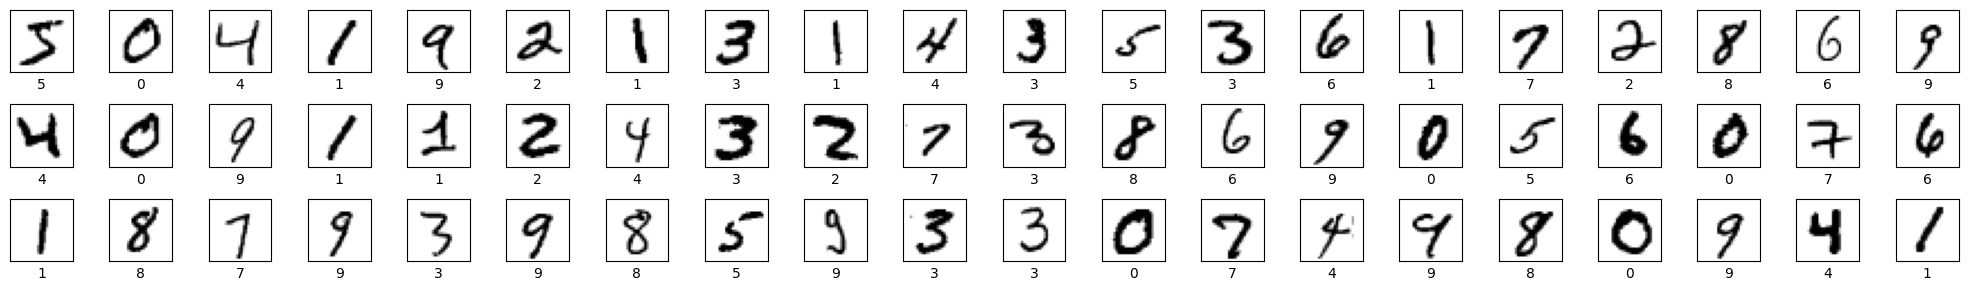

In [16]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [20]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [23]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [44]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [46]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k=h

Epoch 1/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0622 - val_accuracy: 0.9894
Epoch 2/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0553 - val_accuracy: 0.9898
Epoch 3/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0699 - val_accuracy: 0.9887
Epoch 4/5
750/750 [==============================] - 37s 50ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0530 - val_accuracy: 0.9897
Epoch 5/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0630 - val_accuracy: 0.9877


In [47]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [48]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k1=h

Epoch 1/5
750/750 [==============================] - 39s 51ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0488 - val_accuracy: 0.9912
Epoch 2/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0478 - val_accuracy: 0.9916
Epoch 3/5
750/750 [==============================] - 33s 43ms/step - loss: 9.6306e-04 - accuracy: 0.9997 - val_loss: 0.0480 - val_accuracy: 0.9915
Epoch 4/5
750/750 [==============================] - 31s 41ms/step - loss: 7.3565e-04 - accuracy: 0.9999 - val_loss: 0.0483 - val_accuracy: 0.9914
Epoch 5/5
750/750 [==============================] - 33s 43ms/step - loss: 5.9821e-04 - accuracy: 0.9999 - val_loss: 0.0484 - val_accuracy: 0.9915


In [49]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [50]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k2=h

Epoch 1/5
750/750 [==============================] - 32s 41ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0625 - val_accuracy: 0.9902
Epoch 2/5
750/750 [==============================] - 32s 43ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0613 - val_accuracy: 0.9927
Epoch 3/5
750/750 [==============================] - 30s 40ms/step - loss: 8.0384e-04 - accuracy: 0.9998 - val_loss: 0.0724 - val_accuracy: 0.9919
Epoch 4/5
750/750 [==============================] - 29s 39ms/step - loss: 4.4232e-04 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9922
Epoch 5/5
750/750 [==============================] - 30s 40ms/step - loss: 6.0535e-04 - accuracy: 0.9998 - val_loss: 0.0774 - val_accuracy: 0.9916


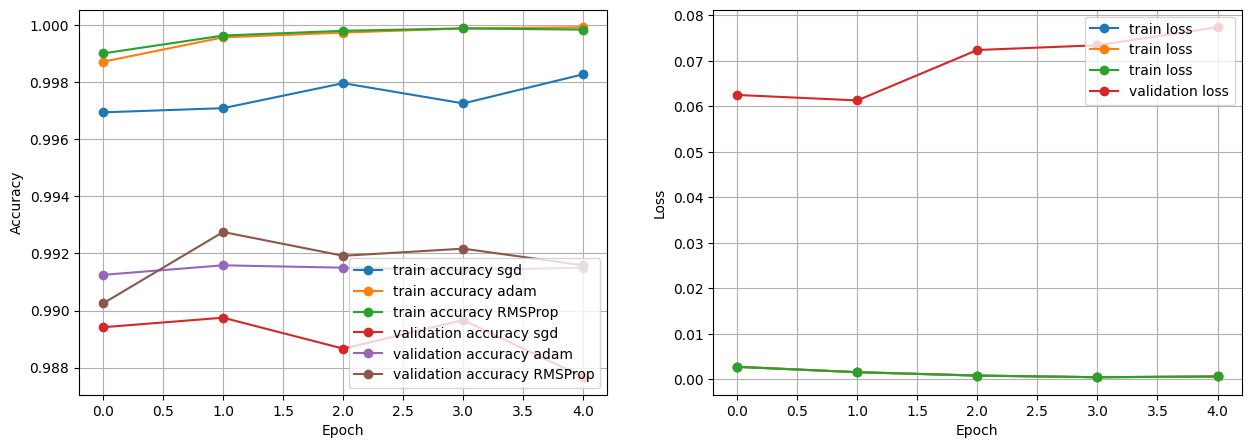

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [53]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0647 - accuracy: 0.9909

Test Accuracy: 0.9908999800682068

Test Loss: 0.06471452116966248
